<a href="https://colab.research.google.com/github/nithinbadicodes/AI-ML-Projects/blob/master/Employee_Turnover_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Employee churn


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

plt.style.use('ggplot')
warnings.simplefilter('ignore')

## Reading the data

In [83]:
df = pd.read_csv('/content/employee_data.csv')

In [84]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


In [85]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [86]:
df.shape

(11582, 10)

## Exploratory Data Analysis

In [87]:
pd.crosstab(df.salary,df.quit)

quit,0,1
salary,,
high,853,48
low,4401,1182
medium,4327,770


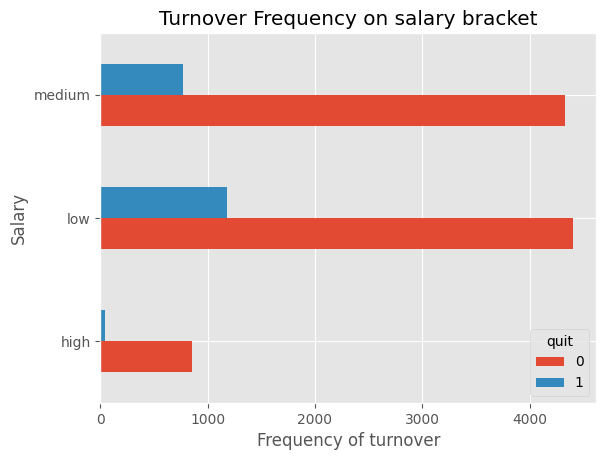

In [88]:
pd.crosstab(df.salary,df.quit).plot(kind='barh')
plt.title('Turnover Frequency on salary bracket')
plt.xlabel('Frequency of turnover')
plt.ylabel('Salary')
plt.show()

* **High earners are more likely to stay** - The "high" salary bracket shows minimal turnover, with most employees remaining in their positions (blue bar is very small).
* **Low and medium earners have similar turnover rates** - Both groups show substantial employee departures (large red bars), suggesting salary level alone doesn't explain the difference between these brackets.

In [89]:
df.department.value_counts()

,count
department,
sales,3092
technical,2227
support,1790
IT,935
RandD,689
product_mng,638
marketing,633
accounting,611
hr,601


In [90]:
pd.crosstab(df.department,df.quit)

quit,0,1
department,,
IT,776,159
RandD,603,86
accounting,501,110
hr,488,113
management,313,52
marketing,521,112
product_mng,528,110
sales,2536,556
support,1478,312


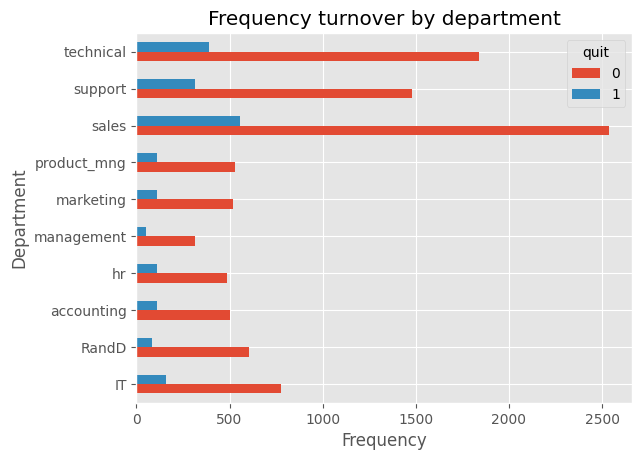

In [91]:
pd.crosstab(df.department,df.quit).plot(kind='barh')
plt.title('Frequency turnover by department')
plt.ylabel('Department')
plt.xlabel('Frequency')
plt.show()

* **Sales dominates turnover frequency** - Sales has by far the highest number of departures (~2,500), confirming it's the organization's biggest retention challenge.
* **Technical roles have surprisingly high turnover** - Despite typically being well-retained, technical shows the second-highest departure volume (~1,800).
*  Sales, technical, and support departments should be immediate priorities for retention initiatives, as they represent the bulk of organizational turnover costs.

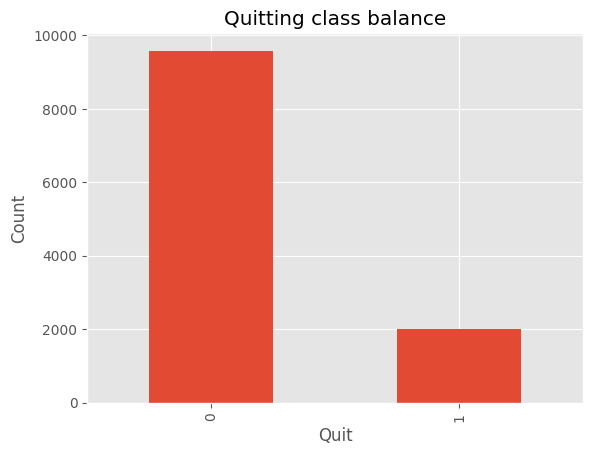

In [92]:
df['quit'].value_counts().plot(kind='bar')
plt.title('Quitting class balance')
plt.xlabel('Quit')
plt.ylabel('Count')
plt.show();

## Data preprocessing

* Encode categorical features
* Split data into train and test sets


**Encode categorical features**

In [93]:
cat_cols = ['department','salary']
for i in cat_cols:
  cat_df = pd.get_dummies(df[i],prefix=i,dtype='int')
  df = df.join(cat_df)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0.0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0.0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0.0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [94]:
df = df.drop(['department','salary'],axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0


**Split the data into X and y**

In [95]:
# Removing the one missing value row
df = df.dropna(axis=0)

In [96]:
# Creates a boolean list to feed to df.loc[]
df.columns !='quit'

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [97]:
X = df.loc[:,df.columns !='quit']
y = df['quit']

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
len(X_train),len(X_test)

(9264, 2317)

In [99]:
# Inputing stratify = y gives the same ratio as the original dataset
pd.Series(y_train).value_counts()

,count
quit,
0,7664
1,1600


## Model evaluation

In [100]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=10)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [101]:
y_pred_dtc = dtc.predict(X_test)

In [102]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,classification_report


mae_dtc = mean_absolute_error(y_test,y_pred_dtc)
print(f'Mean Absolute error for Decision trees is {mae_dtc:.3f}')
mse_dtc = mean_squared_error(y_test,y_pred_dtc)
print(f'Mean Squared error for Decision trees is {mse_dtc:.3f}')

print('-'*20)
print('Classification report for Decision Trees')
print(classification_report(y_test,y_pred_dtc))

Mean Absolute error for Decision trees is 0.020
Mean Squared error for Decision trees is 0.020
--------------------
Classification report for Decision Trees
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1917
           1       0.95      0.93      0.94       400

    accuracy                           0.98      2317
   macro avg       0.97      0.96      0.96      2317
weighted avg       0.98      0.98      0.98      2317



### Bias vs Variance:
* **Bias** = How far off your model's predictions are from the true values on average

* *Low bias* = Model can capture complex patterns and get close to true relationships
* *High bias* = Model oversimplifies and consistently misses the target

* **Variance** = How much your model's predictions change when trained on different datasets

* *Low variance* = Consistent, stable predictions across different training sets
* *High variance* = Predictions vary wildly with small changes in training data

*Decision tree has low bias and suffers from high variance. To solve this problem, we implement Random Forest Classifier*

In [103]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

RandomForestClassifier()

In [104]:
y_pred_rfc = rfc.predict(X_test)

In [105]:

mae_rfc = mean_absolute_error(y_test,y_pred_rfc)
print(f'Mean Absolute error for Random Forest is {mae_rfc:.3f}')
mse_rfc = mean_squared_error(y_test,y_pred_dtc)
print(f'Mean Squared error for Random Forest is {mse_rfc:.3f}')

print('-'*20)
print('Classification report for Random Forest')
print(classification_report(y_test,y_pred_rfc))

Mean Absolute error for Random Forest is 0.016
Mean Squared error for Random Forest is 0.020
--------------------
Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1917
           1       0.99      0.92      0.95       400

    accuracy                           0.98      2317
   macro avg       0.99      0.96      0.97      2317
weighted avg       0.98      0.98      0.98      2317



### Random Forest reduces variance by:

* Training many trees on different data samples
* Averaging their predictions
* Individual trees still have high variance, but average is stable

## Choosing the best model based on ROC curves

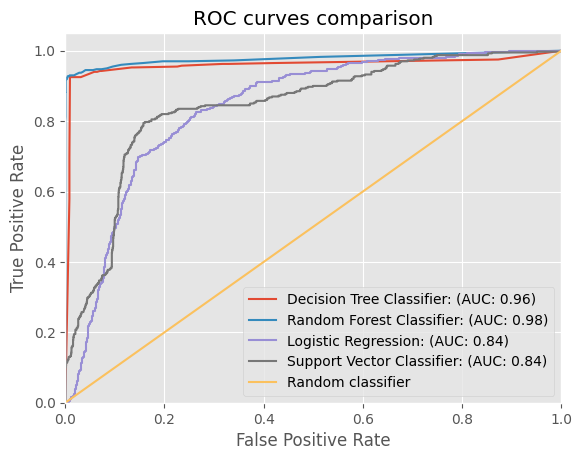

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc

models = {
    'Decision Tree Classifier':dtc,
    'Random Forest Classifier':rfc,
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier':SVC(probability=True)
}

for name, model in models.items():
  model.fit(X_train,y_train)
  y_pred_proba = model.predict_proba(X_test)
  fpr,tpr,_ = roc_curve(y_test,y_pred_proba[:,1])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr,label=f'{name}: (AUC: {roc_auc:.2f})')
plt.plot([0,1],[0,1],label='Random classifier')
plt.title('ROC curves comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.05)
plt.legend()
plt.show()


### Model Performance Ranking:

* Random Forest (AUC: 0.98) - Excellent performance
* Decision Tree (AUC: 0.96) - Very good performance
* Logistic Regression & SVM (AUC: 0.84) - Good performance

* **Linear vs Tree-based Models:** The tree-based models (Random Forest, Decision Tree) significantly outperform linear models (Logistic Regression, SVM), suggesting your data likely has non-linear patterns or feature interactions.
* **Random Forest Advantage:** Slightly edges out Decision Tree, likely due to ensemble averaging reducing overfitting and improving generalization.